In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv("rent.csv")
print(df)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair   

     Garage   Price  
0    

In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [12]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [17]:
degree_map = {
    "Excellent": 1,
    "Good": 2,
    "Fair ": 3,
    "Poor":4,
}

df["Condition"] = df["Condition"].map(degree_map)

In [6]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [19]:
df["Area"].describe()

count    2000.000000
mean     2786.209500
std      1295.146799
min       501.000000
25%      1653.000000
50%      2833.000000
75%      3887.500000
max      4999.000000
Name: Area, dtype: float64

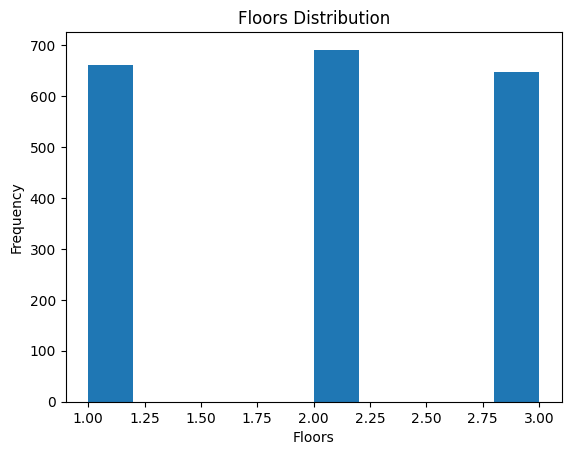

In [7]:
plt.hist(df["Floors"], bins=10)
plt.xlabel("Floors")
plt.ylabel("Frequency")
plt.title("Floors Distribution")
plt.show()

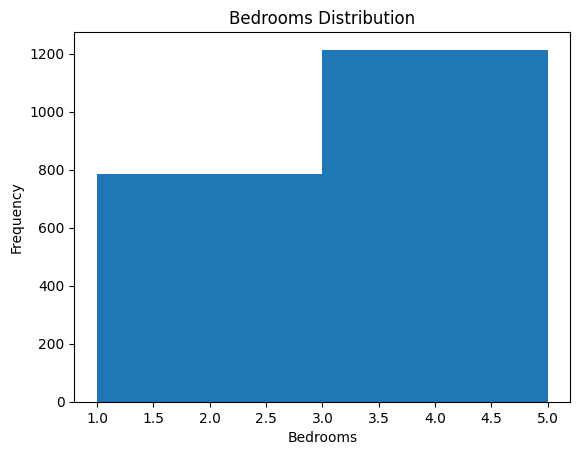

In [8]:
plt.hist(df["Bedrooms"], bins=2)
plt.xlabel("Bedrooms")
plt.ylabel("Frequency")
plt.title("Bedrooms Distribution")
plt.show()

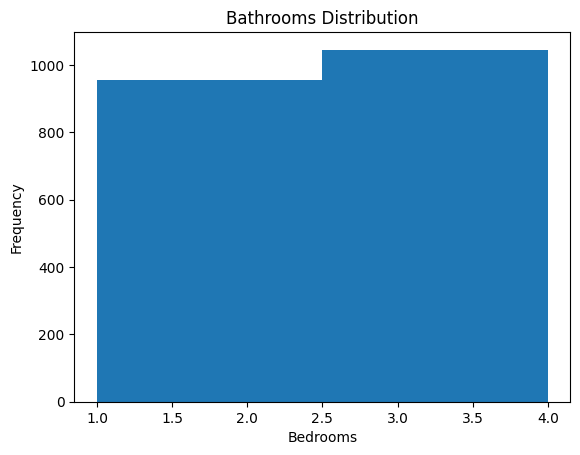

In [9]:
plt.hist(df["Bathrooms"], bins=2)
plt.xlabel("Bedrooms")
plt.ylabel("Frequency")
plt.title("Bathrooms Distribution")
plt.show()

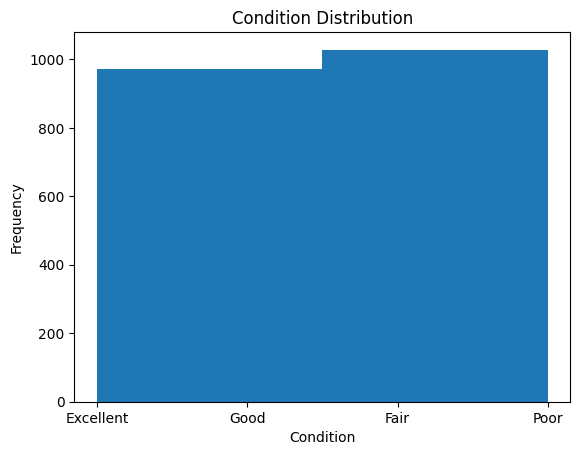

In [10]:
plt.hist(df["Condition"], bins=2)
plt.xlabel("Condition")
plt.ylabel("Frequency")
plt.title("Condition Distribution")
plt.show()

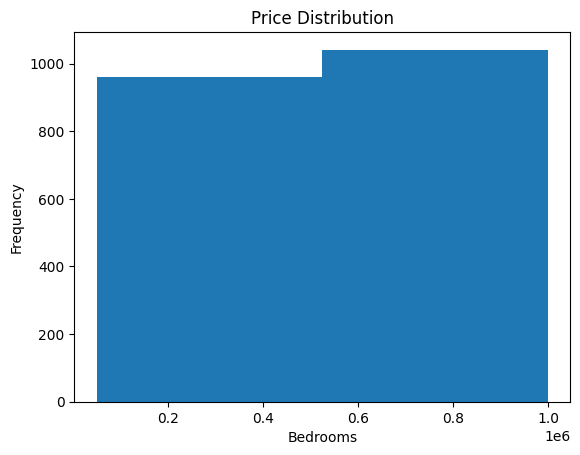

In [11]:
plt.hist(df["Price"], bins=2)
plt.xlabel("Bedrooms")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

In [12]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]


In [13]:
print(df_clean)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair   

     Garage   Price  
0    

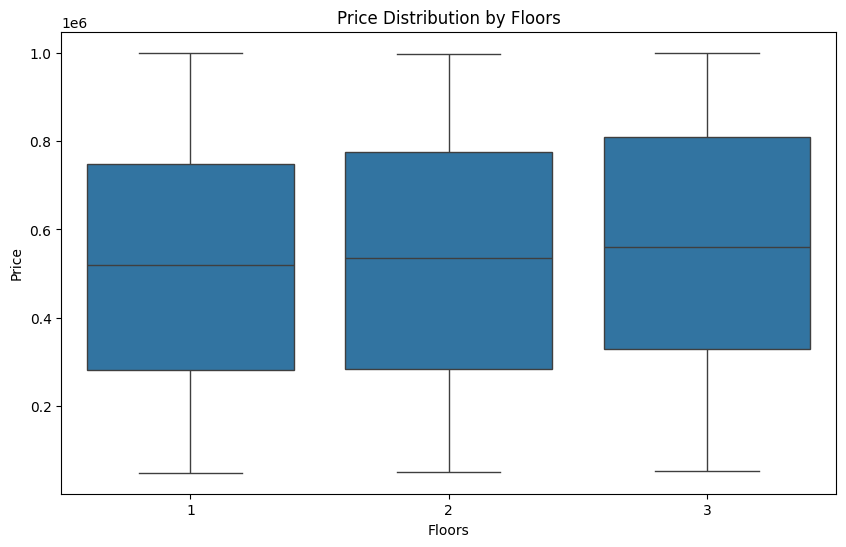

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Floors', y='Price', data=df)
plt.title("Price Distribution by Floors")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

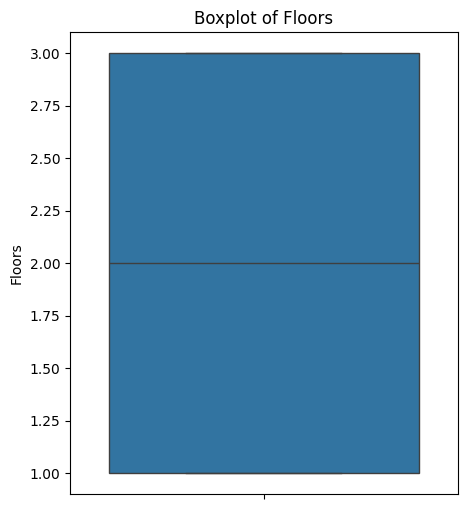

In [15]:
plt.figure(figsize=(5, 6))
sns.boxplot(y=df['Floors'])
plt.title("Boxplot of Floors")
plt.ylabel("Floors")
plt.show()

In [16]:
X = df[["Area"]]
y = df["Price"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))

MAE : 242478.32249473498
RMSE: 279027.1086887075
R2  : -0.0007365003351658128


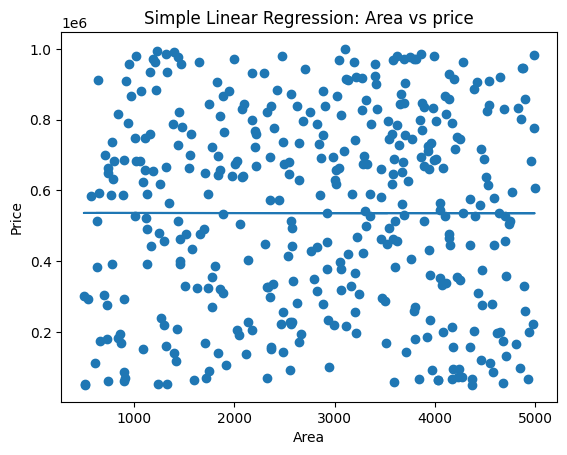

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs price")
plt.show()

In [22]:
exp = pd.DataFrame([[6]], columns=['Area'])

pred_rate = model.predict(exp)


print("Predicted rate:", pred_rate[0])

Predicted rate: 536692.5762277732
